🔹 MAE: 84.32
🔹 MSE: 12325.64
🔹 RMSE: 111.02
🔹 R² Score: 0.9987


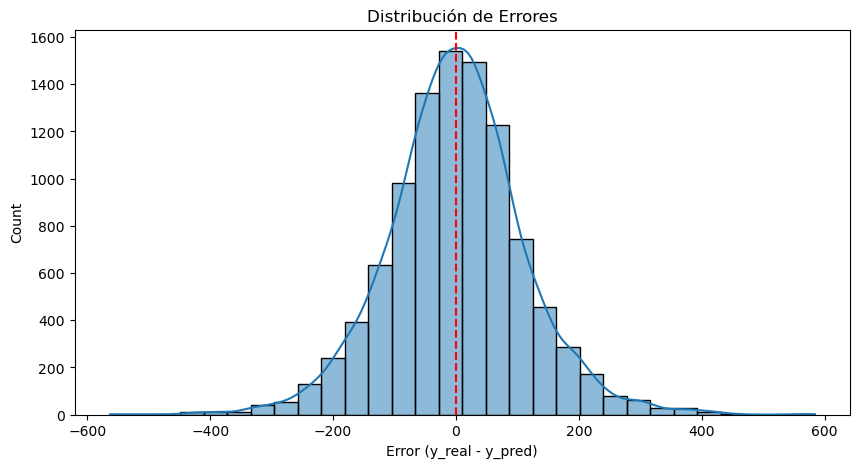

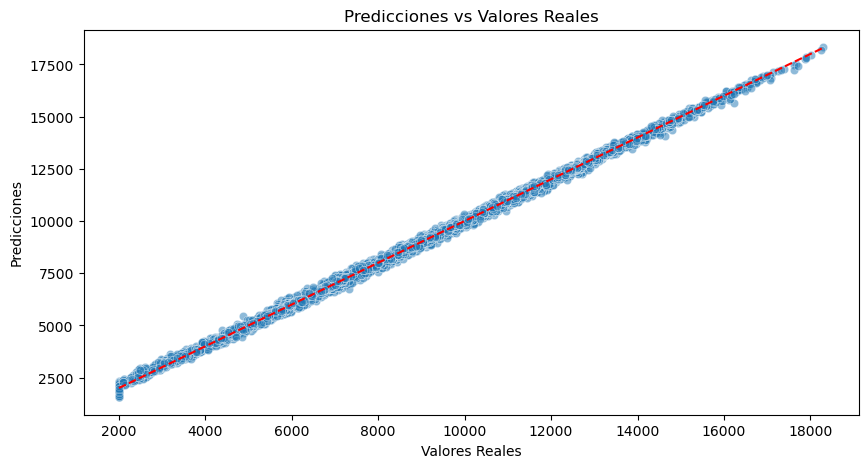

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from joblib import load
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

modelo = load("car_price_model_GB.pkl")

df = pd.read_csv("../car_price_dataset.csv")

label_encoders = load("label_encoders_GB.pkl")

# Aplicar los label encoders a las columnas categóricas
categorical_columns = label_encoders.keys()  # Obtiene las columnas categóricas
for col in categorical_columns:
    df[col] = label_encoders[col].transform(df[col]) 

X = df.drop(columns=["Price"])
y_real = df["Price"]

y_pred = modelo.predict(X)

# 📊 MÉTRICAS DE RENDIMIENTO
mae = mean_absolute_error(y_real, y_pred)
mse = mean_squared_error(y_real, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_real, y_pred)

print(f"🔹 MAE: {mae:.2f}")
print(f"🔹 MSE: {mse:.2f}")
print(f"🔹 RMSE: {rmse:.2f}")
print(f"🔹 R² Score: {r2:.4f}")

# 📉 Visualización: Distribución de errores
errores = y_real - y_pred

plt.figure(figsize=(10,5))
sns.histplot(errores, bins=30, kde=True)
plt.axvline(0, color='r', linestyle='dashed')
plt.xlabel("Error (y_real - y_pred)")
plt.title("Distribución de Errores")
plt.show()

# 📈 Gráfico de Predicciones vs Valores Reales
plt.figure(figsize=(10,5))
sns.scatterplot(x=y_real, y=y_pred, alpha=0.5)
plt.plot([y_real.min(), y_real.max()], [y_real.min(), y_real.max()], color='red', linestyle='dashed')
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Predicciones vs Valores Reales")
plt.show()